# Time Series: Forecasting Bitcoin price

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [2]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


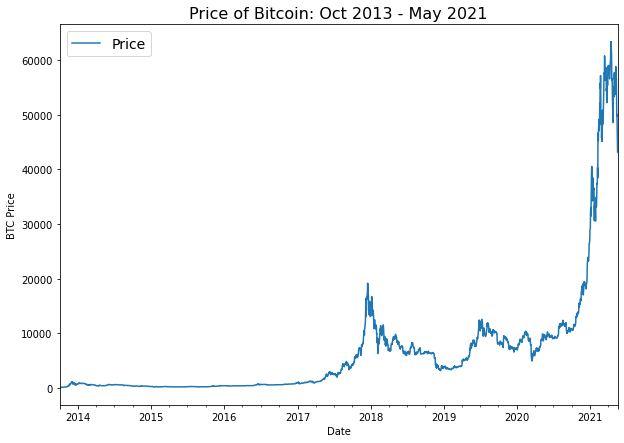

In [7]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [8]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

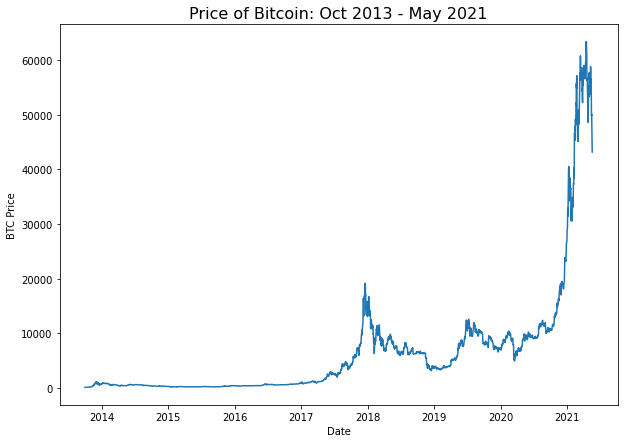

In [9]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [10]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

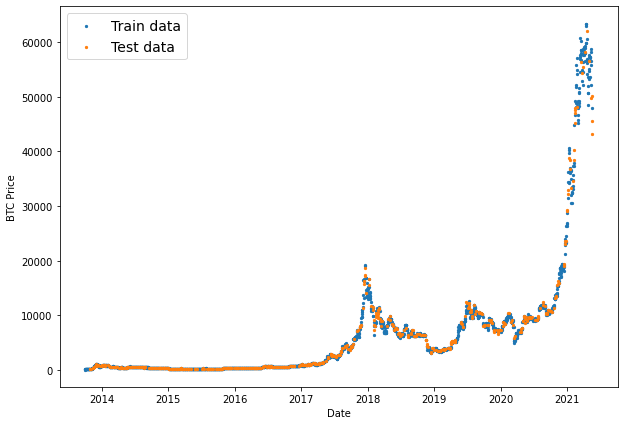

In [12]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

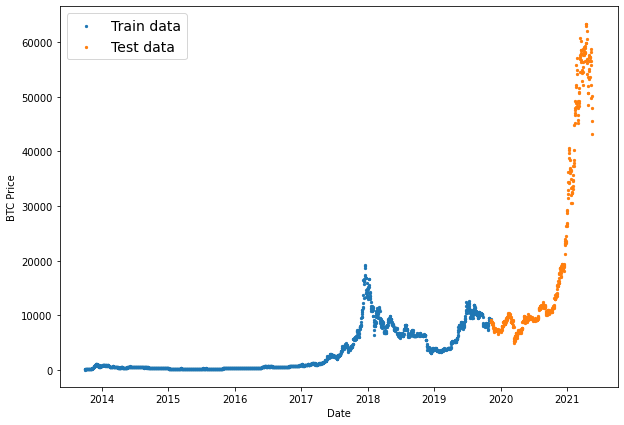

In [14]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

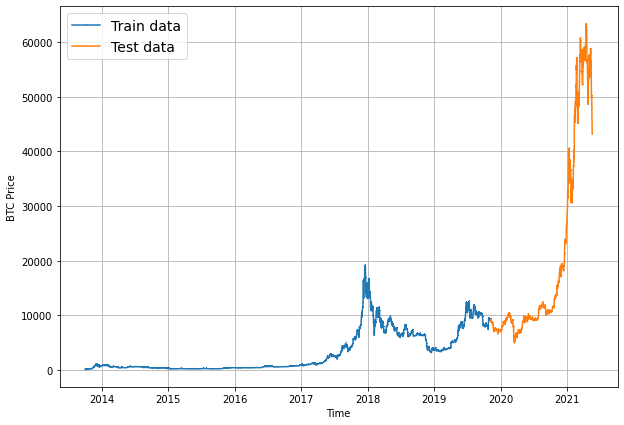

In [16]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


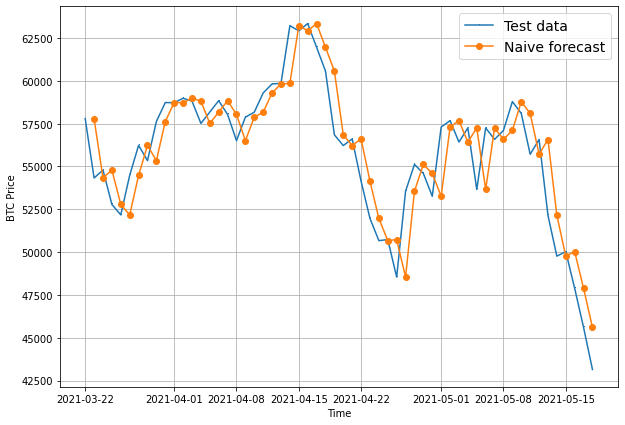

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [20]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [21]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [23]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [25]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [27]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [28]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [31]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [32]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [35]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [36]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 5s 184ms/step - loss: 939.8355 - mae: 939.8355 - mse: 3348946.0000 - val_loss: 2637.3821 - val_mae: 2637.3821 - val_mse: 15850944.0000
Epoch 2/100
18/18 [==============================] - 2s 99ms/step - loss: 265.6639 - mae: 265.6639 - mse: 315430.7188 - val_loss: 1003.1210 - val_mae: 1003.1210 - val_mse: 3360920.5000
Epoch 3/100
18/18 [==============================] - 2s 111ms/step - loss: 187.8885 - mae: 187.8885 - mse: 168131.7969 - val_loss: 976.1526 - val_mae: 976.1526 - val_mse: 3048057.7500
Epoch 4/100
18/18 [==============================] - 2s 107ms/step - loss: 174.1818 - mae: 174.1818 - mse: 160772.6406 - val_loss: 939.1409 - val_mae: 939.1409 - val_mse: 2971668.7500
Epoch 5/100
18/18 [==============================] - 2s 103ms/step - loss: 166.9693 - mae: 166.9693 - mse: 147764.2500 - val_loss: 917.7813 - val_mae: 917.7813 - val_mse: 2724103.2500
Epoch 6/100
18/18 [==============================] - 2s 101ms/step - loss: 

In [37]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 623.7064 - mae: 623.7064 - mse: 1280865.6250


[623.7064208984375, 623.7064208984375, 1280865.625]

In [38]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 571.7388 - mae: 571.7388 - mse: 1182697.5000


[571.73876953125, 571.73876953125, 1182697.5]

In [39]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [40]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 5ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8776.944, 8660.995, 8921.642, 8707.462, 8624.36 , 8655.247,
        8593.641, 8414.611, 8375.3  , 8426.443], dtype=float32)>)

In [41]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 623.7064,
 'mse': 1280865.5,
 'rmse': 1131.7533,
 'mape': 2.803442,
 'mase': 1.0956794}

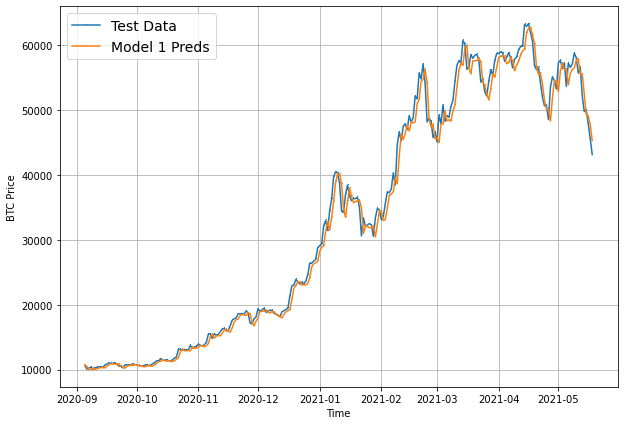

In [42]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [43]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [47]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [48]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 765.5753 - mae: 765.5753


[765.5752563476562, 765.5752563476562]

In [49]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 620.5169 - mae: 620.5169


[620.5169067382812, 620.5169067382812]

In [50]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 4ms/step


In [51]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 765.5753,
 'mse': 1714130.8,
 'rmse': 1309.2482,
 'mape': 3.6745667,
 'mase': 1.3382332}

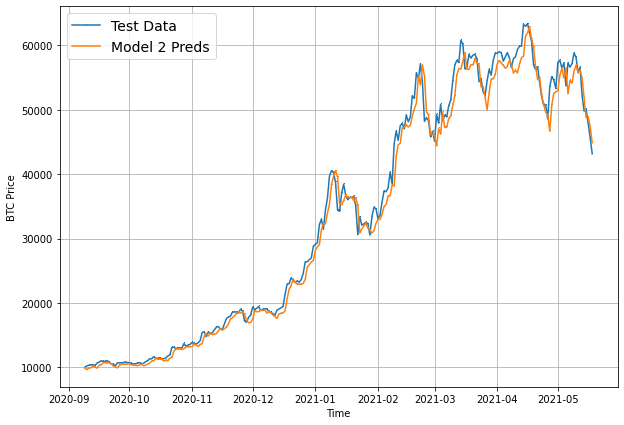

In [52]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [53]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1326.2664 - mae: 1326.2664


[1326.266357421875, 1326.266357421875]

In [58]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9255.955 , 9178.522 , 9083.936 , 9248.64  , 9202.789 , 9339.381 ,
        9146.415 ],
       [8769.312 , 8791.857 , 8861.8955, 9082.627 , 8853.502 , 8853.644 ,
        8888.793 ],
       [8603.942 , 8843.108 , 8941.346 , 9067.371 , 8716.259 , 8588.802 ,
        8762.202 ]], dtype=float32)>

In [59]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 414.73325 ,  211.27986 ,  221.07283 ,  250.26855 ,  173.3291  ,
         278.62787 ,  294.66336 ,  299.8674  ,  407.95166 ,  409.55197 ,
         506.75278 ,  572.7226  ,  670.5959  ,  757.41895 ,  475.01834 ,
         207.32108 ,  254.0364  ,  472.69504 ,  465.9246  ,  494.10944 ,
         290.21762 ,  162.31104 ,  142.71422 ,  150.29381 ,  165.04666 ,
         249.7115  ,  353.33322 ,  361.63406 ,  173.67348 ,  140.5865  ,
         121.01423 ,  256.01297 ,  153.40262 ,  173.28871 ,  204.85226 ,
         245.6199  ,  267.69266 ,  268.27057 ,  268.41617 ,  402.59555 ,
         714.75775 ,  237.13477 ,  253.63567 ,  191.97768 ,  126.46917 ,
         183.69943 ,  168.13498 ,  154.19789 ,  232.49861 ,  133.62318 ,
         189.70627 ,  180.36873 ,  187.4675  ,  181.64949 ,  401.8748  ,
         503.09006 ,  715.04694 ,  696.08545 ,  787.3537  ,  668.63184 ,
         473.2308  ,  432.0835  ,  279.26367 ,  481.652   ,  609.20026 ,
         624.18066 ,  583.9175  ,  715.60504

In [60]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [61]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1326.2665,
 'mse': 5710666.5,
 'rmse': 1515.7599,
 'mape': 5.88193,
 'mase': 2.3600166}

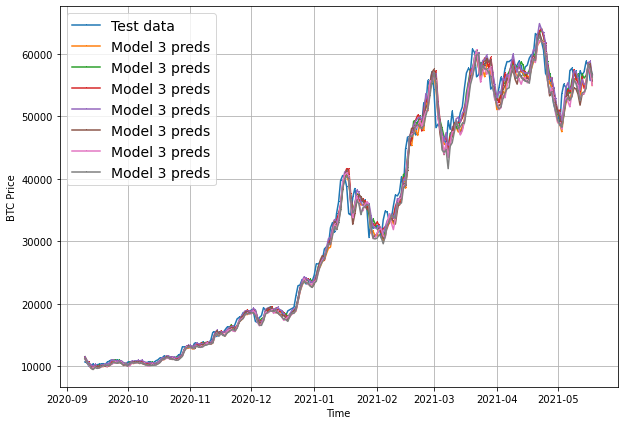

In [62]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

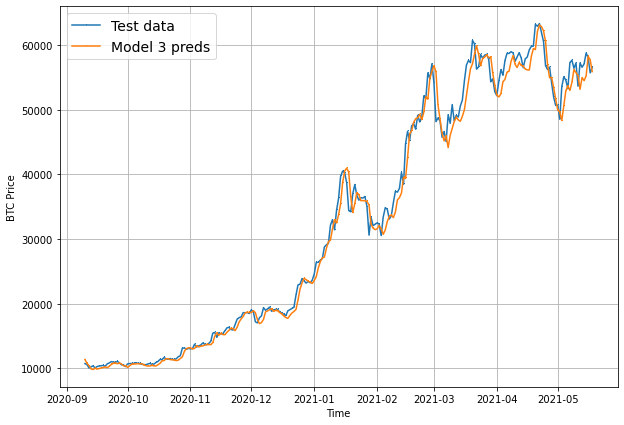

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

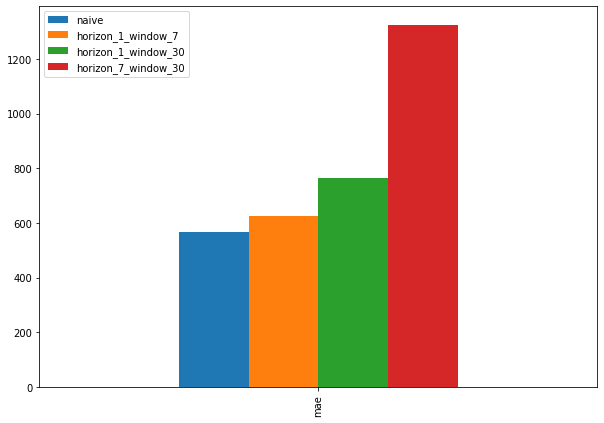

In [64]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [65]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [68]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [69]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [70]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [72]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 2526.9424 

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 5s 185ms/step - loss: 1887.9539 - val_loss: 2186.8008
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 342.9960

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 147ms/step - loss: 302.9980 - val_loss: 1449.3881
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 228.7165

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 136ms/step - loss: 217.8420 - val_loss: 1059.5205
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 191.3775

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 126ms/step - loss: 188.6645 - val_loss: 1024.0699
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 192.0741

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 124ms/step - loss: 182.9053 - val_loss: 1016.8403
Epoch 6/100
 9/18 [==============>...............] - ETA: 0s - loss: 174.3914

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 136ms/step - loss: 179.8296 - val_loss: 1004.4086
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 184.4539

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 137ms/step - loss: 178.0421 - val_loss: 978.7353
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 173.7126 - val_loss: 985.7573
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 171.4274 - val_loss: 993.4628
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 164.3276

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 145ms/step - loss: 169.0494 - val_loss: 941.9500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 165.8656

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 170ms/step - loss: 165.8656 - val_loss: 921.0366
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 164.6485 - val_loss: 959.6221
Epoch 13/100
18/18 [==============================] - 0s 13ms/step - loss: 161.5572 - val_loss: 931.5994
Epoch 14/100
10/18 [===============>..............] - ETA: 0s - loss: 155.0899

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 142ms/step - loss: 158.3349 - val_loss: 900.0290
Epoch 15/100
18/18 [==============================] - 0s 13ms/step - loss: 157.2901 - val_loss: 918.4592
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 154.7330

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 124ms/step - loss: 153.2428 - val_loss: 851.8499
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 150.8117 - val_loss: 876.7770
Epoch 18/100
10/18 [===============>..............] - ETA: 0s - loss: 158.7771

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 149ms/step - loss: 148.9546 - val_loss: 840.9674
Epoch 19/100
18/18 [==============================] - 0s 13ms/step - loss: 145.1058 - val_loss: 847.8958
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 148.7657

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 148ms/step - loss: 145.8051 - val_loss: 817.5411
Epoch 21/100
12/18 [===================>..........] - ETA: 0s - loss: 145.9957

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 113ms/step - loss: 143.8980 - val_loss: 779.0353
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 140.2889 - val_loss: 784.4783
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 137.4549 - val_loss: 785.0850
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 136.5244

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 125ms/step - loss: 137.8338 - val_loss: 770.8898
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 141.5843

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 125ms/step - loss: 135.0244 - val_loss: 744.4581
Epoch 26/100
 9/18 [==============>...............] - ETA: 0s - loss: 129.3306

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 136ms/step - loss: 132.5399 - val_loss: 736.7206
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 138.9493

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 132.1542 - val_loss: 721.9399
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 128.7419

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 146ms/step - loss: 128.9762 - val_loss: 712.9829
Epoch 29/100
12/18 [===================>..........] - ETA: 0s - loss: 128.7174

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 136ms/step - loss: 127.3865 - val_loss: 712.7511
Epoch 30/100
18/18 [==============================] - 0s 11ms/step - loss: 131.8496 - val_loss: 896.9760
Epoch 31/100
18/18 [==============================] - 0s 11ms/step - loss: 137.5156 - val_loss: 755.3363
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 134.0678

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 144ms/step - loss: 130.2168 - val_loss: 708.9256
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 131.3530

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 149ms/step - loss: 127.1676 - val_loss: 682.4948
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 126.1490

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 150ms/step - loss: 122.9006 - val_loss: 675.5162
Epoch 35/100
18/18 [==============================] - 0s 11ms/step - loss: 122.9866 - val_loss: 675.9838
Epoch 36/100
18/18 [==============================] - 0s 14ms/step - loss: 125.3057 - val_loss: 727.5203
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 120.6730

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 134ms/step - loss: 122.1610 - val_loss: 654.7719
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 126.9309

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 126ms/step - loss: 120.2524 - val_loss: 648.6943
Epoch 39/100
18/18 [==============================] - 0s 12ms/step - loss: 119.4254 - val_loss: 650.8372
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 116.5275

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 132ms/step - loss: 117.8483 - val_loss: 642.7382
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 124.4041

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 119.1532 - val_loss: 635.2268
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 116.2293

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 149ms/step - loss: 120.0234 - val_loss: 633.6756
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 116.4959 - val_loss: 636.0463
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 112.1047

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 132ms/step - loss: 116.8688 - val_loss: 623.7988
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 114.1031

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 141ms/step - loss: 116.3528 - val_loss: 622.8845
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 115.8617 - val_loss: 625.4021
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 121.7197 - val_loss: 728.8495
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 118.6225 - val_loss: 663.3306
Epoch 49/100
10/18 [===============>..............] - ETA: 0s - loss: 126.3371

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 117.9867 - val_loss: 610.2754
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 113.4122 - val_loss: 625.3512
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0531 - val_loss: 615.7504
Epoch 52/100
 9/18 [==============>...............] - ETA: 0s - loss: 115.3630

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 116.7223 - val_loss: 602.2559
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 116.6385 - val_loss: 612.8491
Epoch 54/100
18/18 [==============================] - 0s 12ms/step - loss: 113.9730 - val_loss: 618.8113
Epoch 55/100
18/18 [==============================] - 0s 11ms/step - loss: 116.3725 - val_loss: 619.4916
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 113.4825 - val_loss: 803.0759
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 133.1799 - val_loss: 662.8362
Epoch 58/100
18/18 [==============================] - 0s 11ms/step - loss: 121.7818 - val_loss: 657.1966
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 108.7383

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 4s 213ms/step - loss: 112.0005 - val_loss: 598.8893
Epoch 60/100
18/18 [==============================] - 0s 19ms/step - loss: 111.3997 - val_loss: 615.5808
Epoch 61/100
18/18 [==============================] - 0s 16ms/step - loss: 111.4572 - val_loss: 601.9135
Epoch 62/100
 9/18 [==============>...............] - ETA: 0s - loss: 101.6422

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 155ms/step - loss: 110.9479 - val_loss: 596.6279
Epoch 63/100
11/18 [=================>............] - ETA: 0s - loss: 117.7787

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 113.0671 - val_loss: 591.8348
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 112.1425 - val_loss: 677.8894
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 116.9775

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 115.4447 - val_loss: 591.6058
Epoch 66/100
12/18 [===================>..........] - ETA: 0s - loss: 109.0890

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 124ms/step - loss: 111.4573 - val_loss: 584.3912
Epoch 67/100
18/18 [==============================] - 0s 12ms/step - loss: 109.0982 - val_loss: 617.8762
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 115.5542 - val_loss: 683.1103
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 126.0997 - val_loss: 675.0789
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 123.0430 - val_loss: 610.0998
Epoch 71/100
18/18 [==============================] - 0s 11ms/step - loss: 111.8844 - val_loss: 608.9645
Epoch 72/100
18/18 [==============================] - 0s 11ms/step - loss: 112.4521 - val_loss: 596.4814
Epoch 73/100
11/18 [=================>............] - ETA: 0s - loss: 110.7491

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 110.0205 - val_loss: 583.8210
Epoch 74/100
11/18 [=================>............] - ETA: 0s - loss: 112.8885

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 125ms/step - loss: 111.2019 - val_loss: 581.8687
Epoch 75/100
13/18 [====================>.........] - ETA: 0s - loss: 108.0128

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 109.5231 - val_loss: 580.0074
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 110.5611

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 131ms/step - loss: 109.5727 - val_loss: 576.9750
Epoch 77/100
11/18 [=================>............] - ETA: 0s - loss: 115.6366

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 110.4910 - val_loss: 576.4438
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 110.0415 - val_loss: 589.0298
Epoch 79/100
18/18 [==============================] - 0s 11ms/step - loss: 110.1972 - val_loss: 611.6005
Epoch 80/100
18/18 [==============================] - 0s 11ms/step - loss: 109.4893 - val_loss: 595.1813
Epoch 81/100
18/18 [==============================] - 0s 11ms/step - loss: 108.8827 - val_loss: 578.8881
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 120.6394

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 136ms/step - loss: 115.1524 - val_loss: 573.6578
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 111.9541 - val_loss: 672.8416
Epoch 84/100
10/18 [===============>..............] - ETA: 0s - loss: 116.9272

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 157ms/step - loss: 115.3863 - val_loss: 572.7822
Epoch 85/100
18/18 [==============================] - 0s 11ms/step - loss: 108.5197 - val_loss: 593.0728
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 109.0155 - val_loss: 624.4894
Epoch 87/100
18/18 [==============================] - 0s 12ms/step - loss: 111.5949 - val_loss: 577.5103
Epoch 88/100
18/18 [==============================] - 0s 10ms/step - loss: 111.3508 - val_loss: 581.1912
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 113.3462 - val_loss: 587.9492
Epoch 90/100
18/18 [==============================] - 0s 12ms/step - loss: 108.4579 - val_loss: 650.9540
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 110.0238 - val_loss: 592.0925
Epoch 92/100
18/18 [==============================] - 0s 12ms/step - loss: 110.9153 - val_loss: 591.5746
Epoch 93/100
18/18 [==============================] - 0s 11ms/step 

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 129ms/step - loss: 108.5325 - val_loss: 568.7681
Epoch 99/100
18/18 [==============================] - 0s 12ms/step - loss: 108.4674 - val_loss: 570.7642
Epoch 100/100
18/18 [==============================] - 0s 12ms/step - loss: 115.3415 - val_loss: 663.9744


In [74]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 663.9744


663.9744262695312

In [76]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 568.7682


568.7681884765625

In [77]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8900.047, 8800.511, 9016.179, 8804.795, 8756.841, 8747.84 ,
       8692.319, 8549.319, 8473.356, 8530.593], dtype=float32)>

In [78]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 568.7682,
 'mse': 1181881.5,
 'rmse': 1087.1437,
 'mape': 2.543415,
 'mase': 0.99916816}

### Model 5 - LSTM (RNN)

In [79]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2296.6931INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 10s 374ms/step - loss: 2212.2332 - val_loss: 8630.6533
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 805.6957INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 357ms/step - loss: 721.1108 - val_loss: 1121.8828
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 251.4267 - val_loss: 1267.7952
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 202.1107INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 331ms/step - loss: 200.2527 - val_loss: 1056.6847
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 189.5662INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 376ms/step - loss: 187.5312 - val_loss: 1051.7360
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 186.8185INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 347ms/step - loss: 187.6809 - val_loss: 1044.8405
Epoch 7/100
18/18 [==============================] - 0s 17ms/step - loss: 182.9844 - val_loss: 1049.7795
Epoch 8/100
18/18 [==============================] - 0s 17ms/step - loss: 181.1038 - val_loss: 1058.2222
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 182.1863INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 390ms/step - loss: 179.2342 - val_loss: 1040.2291
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 175.3288INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 357ms/step - loss: 178.2449 - val_loss: 1017.6225
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 175.8622INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 346ms/step - loss: 177.6210 - val_loss: 1005.7858
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 175.6471INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 351ms/step - loss: 176.1094 - val_loss: 1003.2762
Epoch 13/100
14/18 [======================>.......] - ETA: 0s - loss: 174.0424INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 379ms/step - loss: 174.6107 - val_loss: 994.2542
Epoch 14/100
18/18 [==============================] - 0s 19ms/step - loss: 172.7436 - val_loss: 996.2549
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 174.9570INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 406ms/step - loss: 171.9842 - val_loss: 975.3300
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 170.3668INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 383ms/step - loss: 170.3668 - val_loss: 950.4330
Epoch 17/100
18/18 [==============================] - 0s 22ms/step - loss: 168.1453 - val_loss: 1009.0681
Epoch 18/100
18/18 [==============================] - 0s 20ms/step - loss: 167.4894 - val_loss: 981.6176
Epoch 19/100
18/18 [==============================] - 0s 19ms/step - loss: 165.1358 - val_loss: 977.6594
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 167.5623INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 412ms/step - loss: 164.7935 - val_loss: 919.3468
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 163.4447INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 382ms/step - loss: 162.0534 - val_loss: 911.1464
Epoch 22/100
18/18 [==============================] - 0s 19ms/step - loss: 160.5040 - val_loss: 923.4189
Epoch 23/100
18/18 [==============================] - 0s 19ms/step - loss: 159.4736 - val_loss: 934.5196
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 158.7747INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 344ms/step - loss: 157.0614 - val_loss: 901.5856
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 161.1266INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 356ms/step - loss: 155.7305 - val_loss: 866.5682
Epoch 26/100
18/18 [==============================] - 0s 19ms/step - loss: 153.7575 - val_loss: 872.1699
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 154.0384INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 351ms/step - loss: 152.0445 - val_loss: 857.0906
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 150.0688INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 328ms/step - loss: 150.2058 - val_loss: 835.2406
Epoch 29/100
18/18 [==============================] - 0s 18ms/step - loss: 149.9725 - val_loss: 847.8663
Epoch 30/100
18/18 [==============================] - 0s 19ms/step - loss: 149.1074 - val_loss: 860.9618
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 146.4646INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 350ms/step - loss: 146.2399 - val_loss: 808.3894
Epoch 32/100
18/18 [==============================] - 0s 19ms/step - loss: 144.3579 - val_loss: 817.9324
Epoch 33/100
14/18 [======================>.......] - ETA: 0s - loss: 142.3427INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 322ms/step - loss: 143.1125 - val_loss: 806.5958
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 142.7856INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 360ms/step - loss: 142.7856 - val_loss: 782.1422
Epoch 35/100
18/18 [==============================] - 0s 20ms/step - loss: 140.3260 - val_loss: 790.8011
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 142.7655INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 327ms/step - loss: 143.6331 - val_loss: 773.8061
Epoch 37/100
18/18 [==============================] - 0s 20ms/step - loss: 137.9823 - val_loss: 774.4484
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 136.6867INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 379ms/step - loss: 136.2702 - val_loss: 751.4194
Epoch 39/100
18/18 [==============================] - 0s 21ms/step - loss: 135.6704 - val_loss: 754.0483
Epoch 40/100
18/18 [==============================] - 0s 21ms/step - loss: 136.6096 - val_loss: 772.4741
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 134.9187INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 340ms/step - loss: 134.0457 - val_loss: 730.5930
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 131.2755INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 435ms/step - loss: 131.7877 - val_loss: 728.2534
Epoch 43/100
15/18 [========================>.....] - ETA: 0s - loss: 130.6087INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 363ms/step - loss: 130.8757 - val_loss: 723.6268
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 130.3211INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 351ms/step - loss: 129.0682 - val_loss: 712.0540
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 128.3233INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 363ms/step - loss: 128.2048 - val_loss: 705.8147
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 130.2381INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 420ms/step - loss: 129.1072 - val_loss: 703.7343
Epoch 47/100
18/18 [==============================] - 0s 25ms/step - loss: 127.5873 - val_loss: 713.0031
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 125.9142INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 380ms/step - loss: 127.2812 - val_loss: 692.0219
Epoch 49/100
18/18 [==============================] - 0s 22ms/step - loss: 125.5861 - val_loss: 697.8636
Epoch 50/100
18/18 [==============================] - 0s 24ms/step - loss: 128.8465 - val_loss: 719.6351
Epoch 51/100
18/18 [==============================] - 0s 23ms/step - loss: 126.3682 - val_loss: 766.5574
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 130.5980INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 435ms/step - loss: 125.9111 - val_loss: 672.2169
Epoch 53/100
18/18 [==============================] - 0s 22ms/step - loss: 123.1401 - val_loss: 674.2870
Epoch 54/100
18/18 [==============================] - 0s 22ms/step - loss: 123.2862 - val_loss: 702.5900
Epoch 55/100
14/18 [======================>.......] - ETA: 0s - loss: 127.2507INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 408ms/step - loss: 123.2021 - val_loss: 661.2172
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 124.7901INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 432ms/step - loss: 124.7901 - val_loss: 656.8714
Epoch 57/100
18/18 [==============================] - 0s 22ms/step - loss: 126.5760 - val_loss: 694.6683
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 122.7441INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 359ms/step - loss: 122.0348 - val_loss: 651.8395
Epoch 59/100
18/18 [==============================] - 0s 21ms/step - loss: 120.4582 - val_loss: 653.1014
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3646INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 376ms/step - loss: 121.7277 - val_loss: 646.5540
Epoch 61/100
18/18 [==============================] - 0s 22ms/step - loss: 120.8778 - val_loss: 688.4051
Epoch 62/100
18/18 [==============================] - 0s 23ms/step - loss: 122.4291 - val_loss: 688.5784
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 127.9322INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 381ms/step - loss: 124.5070 - val_loss: 638.6009
Epoch 64/100
18/18 [==============================] - 0s 24ms/step - loss: 117.8602 - val_loss: 658.7512
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 118.3184INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 361ms/step - loss: 119.9021 - val_loss: 633.5303
Epoch 66/100
18/18 [==============================] - 0s 20ms/step - loss: 117.8750 - val_loss: 650.1520
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 119.1473INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 368ms/step - loss: 120.2370 - val_loss: 629.1321
Epoch 68/100
18/18 [==============================] - 0s 23ms/step - loss: 119.1457 - val_loss: 636.2714
Epoch 69/100
18/18 [==============================] - 0s 22ms/step - loss: 121.0323 - val_loss: 636.1795
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 117.0361INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 350ms/step - loss: 117.0361 - val_loss: 623.9708
Epoch 71/100
18/18 [==============================] - 0s 22ms/step - loss: 117.1871 - val_loss: 658.2291
Epoch 72/100
18/18 [==============================] - 0s 22ms/step - loss: 119.7945 - val_loss: 638.5642
Epoch 73/100
15/18 [========================>.....] - ETA: 0s - loss: 117.5660INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 403ms/step - loss: 116.9994 - val_loss: 622.6934
Epoch 74/100
18/18 [==============================] - 1s 31ms/step - loss: 116.0049 - val_loss: 625.0591
Epoch 75/100
18/18 [==============================] - 1s 30ms/step - loss: 116.1462 - val_loss: 645.2767
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8329INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 368ms/step - loss: 115.9963 - val_loss: 616.4913
Epoch 77/100
18/18 [==============================] - 0s 22ms/step - loss: 118.6287 - val_loss: 702.5146
Epoch 78/100
18/18 [==============================] - 0s 25ms/step - loss: 119.9976 - val_loss: 623.0681
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6256INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 364ms/step - loss: 115.2381 - val_loss: 610.8716
Epoch 80/100
18/18 [==============================] - 0s 22ms/step - loss: 114.6019 - val_loss: 621.5486
Epoch 81/100
18/18 [==============================] - 0s 22ms/step - loss: 115.8644 - val_loss: 683.8515
Epoch 82/100
18/18 [==============================] - 0s 20ms/step - loss: 118.1946 - val_loss: 612.7002
Epoch 83/100
18/18 [==============================] - 0s 21ms/step - loss: 114.0730 - val_loss: 640.5140
Epoch 84/100
18/18 [==============================] - 0s 21ms/step - loss: 116.4053 - val_loss: 620.2571
Epoch 85/100
18/18 [==============================] - 0s 20ms/step - loss: 115.0275 - val_loss: 659.3213
Epoch 86/100
18/18 [==============================] - 0s 21ms/step - loss: 117.0531 - val_loss: 619.6105
Epoch 87/100
16/18 [=========================>....] - ETA: 0s - loss: 115.3584INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 335ms/step - loss: 115.0193 - val_loss: 608.3981
Epoch 88/100
18/18 [==============================] - ETA: 0s - loss: 113.5240INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 377ms/step - loss: 113.5240 - val_loss: 608.0374
Epoch 89/100
18/18 [==============================] - 0s 22ms/step - loss: 113.0737 - val_loss: 641.6539
Epoch 90/100
18/18 [==============================] - 0s 26ms/step - loss: 118.7848 - val_loss: 641.6370
Epoch 91/100
18/18 [==============================] - 0s 22ms/step - loss: 115.2542 - val_loss: 612.7881
Epoch 92/100
17/18 [===========================>..] - ETA: 0s - loss: 113.2628INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 393ms/step - loss: 113.2013 - val_loss: 598.4113
Epoch 93/100
18/18 [==============================] - 0s 21ms/step - loss: 113.9142 - val_loss: 598.9164
Epoch 94/100
16/18 [=========================>....] - ETA: 0s - loss: 113.2511INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 352ms/step - loss: 111.9871 - val_loss: 597.2342
Epoch 95/100
18/18 [==============================] - 0s 22ms/step - loss: 112.6085 - val_loss: 598.4952
Epoch 96/100
18/18 [==============================] - 0s 23ms/step - loss: 111.9209 - val_loss: 600.4897
Epoch 97/100
18/18 [==============================] - 0s 21ms/step - loss: 112.3771 - val_loss: 617.5010
Epoch 98/100
18/18 [==============================] - 0s 22ms/step - loss: 113.0297 - val_loss: 597.4396
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 112.1992INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 403ms/step - loss: 111.5945 - val_loss: 592.9869
Epoch 100/100
18/18 [==============================] - 0s 22ms/step - loss: 112.9189 - val_loss: 593.1179


In [80]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 9ms/step - loss: 592.9869


592.9868774414062

In [81]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 1s 7ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8958.168 ,  8828.231 ,  8952.694 ,  8811.08  ,  8765.488 ,
        8714.307 ,  8702.132 ,  8580.18  ,  8460.122 ,  8515.767 ,
        8311.379 ,  8159.531 ,  8064.1787,  7752.301 ,  7381.2256,
        7228.6865,  7064.8457,  7126.1943,  7090.2686,  7383.4136,
        7435.486 ,  7655.524 ,  7638.0444,  7495.0977,  7401.79  ,
        7316.311 ,  7268.009 ,  7324.2227,  7457.59  ,  7545.0586,
        7576.9316,  7431.6484,  7318.051 ,  7220.8037,  7187.796 ,
        7217.241 ,  7122.5376,  7116.3975,  6957.756 ,  6696.6855,
        7143.4473,  7177.2705,  7216.3315,  7246.799 ,  7266.0137,
        7282.131 ,  7209.3047,  7231.617 ,  7222.1353,  7223.1978,
        7291.487 ,  7382.553 ,  7317.4927,  7235.2734,  7194.288 ,
        7038.827 ,  7194.451 ,  7291.9385,  7370.373 ,  7624.1567,
        7944.092 ,  8139.3877,  7973.7383,  8065.933 ,  8121.589 ,
        8185.2188,  8150.115 ,  8548.494 ,  8839.88  ,  8834.403 ,
        8935.5

In [82]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 592.9869,
 'mse': 1257434.5,
 'rmse': 1121.3539,
 'mape': 2.6739311,
 'mase': 1.0417137}

In [83]:
# Adding Blockchain halving events
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Adding block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [84]:
# Creating date ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [85]:
# Adding in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [86]:
# Check top 5 values
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [87]:
# Checking 5 mid values
bitcoin_prices_block[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [88]:
# Checking last 5 values
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

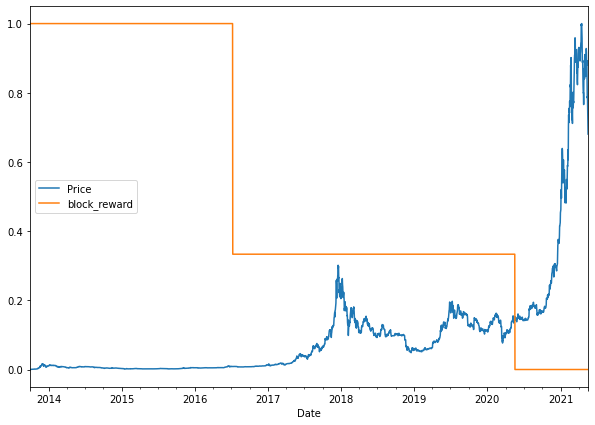

In [89]:
# Plotting block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))

### Creating windowed multi-variate dataset with pandas

In [90]:
# Setting up hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [91]:
# Making a copy of Bitcoin dataset
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Adding windowed column
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [92]:
# Creating X (windows) and y (horizon)
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [93]:
# Making train and test sets, using indexing
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6 - Dense (multivariate time series)

In [94]:
# Making miultivariate tiem series model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compiling the model
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_6 = model_6.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1066.9863 INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 4s 150ms/step - loss: 837.4468 - val_loss: 2015.5699
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 254.0809INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 234.4892 - val_loss: 1202.4396
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 192.3786INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 188.7472 - val_loss: 991.2485
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: 178.2491 - val_loss: 992.9229
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 185.1179INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 176.7009 - val_loss: 988.5407
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 168.5044INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 171.4262 - val_loss: 961.1464
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 165.0211INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 101ms/step - loss: 164.1448 - val_loss: 955.2941
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 157.2998INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 92ms/step - loss: 156.1147 - val_loss: 852.5029
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 154.4891INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 153.3041 - val_loss: 813.9771
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 140.2118INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 87ms/step - loss: 146.0242 - val_loss: 774.3479
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 138.0024 - val_loss: 809.6813
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 134.4968 - val_loss: 830.4316
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 130.0929INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 113ms/step - loss: 135.9010 - val_loss: 762.7087
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 128.7328INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 94ms/step - loss: 130.7937 - val_loss: 713.7661
Epoch 15/100
18/18 [==============================] - 0s 10ms/step - loss: 136.1564 - val_loss: 770.3311
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 131.5014 - val_loss: 832.9944
Epoch 17/100
18/18 [==============================] - 0s 12ms/step - loss: 125.1766 - val_loss: 743.1682
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 126.0797INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 103ms/step - loss: 120.4873 - val_loss: 654.5245
Epoch 19/100
18/18 [==============================] - 0s 12ms/step - loss: 117.7674 - val_loss: 715.4783
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 121.6788INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 117.8872 - val_loss: 641.8597
Epoch 21/100
18/18 [==============================] - 0s 11ms/step - loss: 120.2477 - val_loss: 642.0820
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 124.7522INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 97ms/step - loss: 114.2518 - val_loss: 623.9644
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 109.5055INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 112.2519 - val_loss: 611.6459
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 112.3774INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 112.3419 - val_loss: 604.2345
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 112.9001INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 112.5093 - val_loss: 596.5444
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 111.4963INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 111.6410 - val_loss: 591.9797
Epoch 27/100
18/18 [==============================] - 0s 12ms/step - loss: 112.3916 - val_loss: 609.7314
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 110.0361INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 92ms/step - loss: 109.2080 - val_loss: 585.9574
Epoch 29/100
18/18 [==============================] - 0s 12ms/step - loss: 110.4720 - val_loss: 591.7134
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 115.4555INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 98ms/step - loss: 115.2856 - val_loss: 579.3574
Epoch 31/100
18/18 [==============================] - 0s 13ms/step - loss: 108.4878 - val_loss: 603.4230
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0629 - val_loss: 631.3937
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 111.1190 - val_loss: 579.5723
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 112.0621INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 109.7698 - val_loss: 575.0445
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 108.1565INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 108.4252 - val_loss: 574.3498
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 149.9538INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 88ms/step - loss: 114.5829 - val_loss: 573.6526
Epoch 37/100
18/18 [==============================] - 0s 12ms/step - loss: 108.3277 - val_loss: 575.5991
Epoch 38/100
18/18 [==============================] - 0s 12ms/step - loss: 110.7496 - val_loss: 588.8859
Epoch 39/100
18/18 [==============================] - 0s 11ms/step - loss: 107.8536 - val_loss: 588.4160
Epoch 40/100
18/18 [==============================] - 0s 12ms/step - loss: 107.5754 - val_loss: 574.8030
Epoch 41/100
18/18 [==============================] - 0s 10ms/step - loss: 106.5625 - val_loss: 594.8533
Epoch 42/100
18/18 [==============================] - 0s 12ms/step - loss: 116.5429 - val_loss: 607.5731
Epoch 43/100
18/18 [==============================] - 0s 13ms/step - loss: 115.4264 - val_loss: 640.5305
Epoch 44/100
18/18 [==============================] - 0s 12ms/step - loss: 109.6542 - val_loss: 579.1795
Epoch 45/100
18/18 [==============================] - 0s 11ms/step -

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 108ms/step - loss: 107.6631 - val_loss: 563.9786
Epoch 55/100
18/18 [==============================] - 0s 12ms/step - loss: 106.1372 - val_loss: 564.4312
Epoch 56/100
18/18 [==============================] - 0s 17ms/step - loss: 106.4981 - val_loss: 736.4146
Epoch 57/100
18/18 [==============================] - 0s 12ms/step - loss: 112.3465 - val_loss: 590.9473
Epoch 58/100
18/18 [==============================] - 0s 14ms/step - loss: 108.0496 - val_loss: 565.2203
Epoch 59/100
18/18 [==============================] - 0s 12ms/step - loss: 105.8282 - val_loss: 599.3562
Epoch 60/100
18/18 [==============================] - 0s 13ms/step - loss: 112.3110 - val_loss: 622.2213
Epoch 61/100
18/18 [==============================] - 0s 12ms/step - loss: 110.1563 - val_loss: 568.4861
Epoch 62/100
18/18 [==============================] - 0s 12ms/step - loss: 105.6980 - val_loss: 595.5148
Epoch 63/100
18/18 [==============================] - ETA: 0s - los

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 138ms/step - loss: 106.9296 - val_loss: 562.9752
Epoch 64/100
18/18 [==============================] - 0s 13ms/step - loss: 106.1801 - val_loss: 571.0188
Epoch 65/100
13/18 [====================>.........] - ETA: 0s - loss: 106.4632INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 103ms/step - loss: 106.7803 - val_loss: 562.3105
Epoch 66/100
18/18 [==============================] - 0s 11ms/step - loss: 105.5581 - val_loss: 564.4138
Epoch 67/100
18/18 [==============================] - 0s 14ms/step - loss: 105.3125 - val_loss: 642.8511
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 105.3517 - val_loss: 567.0644
Epoch 69/100
18/18 [==============================] - 0s 11ms/step - loss: 109.1856 - val_loss: 671.2708
Epoch 70/100
18/18 [==============================] - 0s 12ms/step - loss: 123.0056 - val_loss: 578.3080
Epoch 71/100
18/18 [==============================] - 0s 12ms/step - loss: 106.1636 - val_loss: 585.2537
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1573 - val_loss: 567.7679
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 110.8375 - val_loss: 583.8505
Epoch 74/100
18/18 [==============================] - 0s 10ms/step 

In [95]:
# Ecaluating the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 700.9354


700.9353637695312

In [96]:
# Loading the best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 562.3105


562.310546875

In [97]:
# Making predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.257 , 8776.473 , 9032.07  , 8766.235 , 8737.27  , 8722.237 ,
       8677.642 , 8510.004 , 8449.2705, 8522.576 ], dtype=float32)>

In [98]:
# Evaluate predictions
model_6_results = evaluate_preds(
    y_true=y_test,
    y_pred=model_6_preds
)
model_6_results

{'mae': 562.31067,
 'mse': 1147212.2,
 'rmse': 1071.08,
 'mape': 2.51212,
 'mase': 0.9878241}

### Model 7 - N-BEATS algorithm

In [99]:
# Creating NBeatBlock custom layer
class NBeatBlock(tf.keras.layers.Layer):
    def __init__(
        self,
        input_size: int,
        theta_size: int,
        horizon: int,
        n_neurons: int,
        n_layers: int,
        **kwargs # Will take care of super class arguments
    ):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers, each with RELU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta_layer")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast


In [100]:
# Setting up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatBlock(
    input_size=WINDOW_SIZE,
    theta_size=WINDOW_SIZE+HORIZON,
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4
)

In [101]:
# Create dummy inputs (have to be the same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [103]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.14183313  1.3316932  -0.6800094   0.01850083  0.99933946 -0.22882082
 -0.94514227]
Forecast: -0.67649906873703
